In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
conn = engine.connect()

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
h_measure = Base.classes.measurement
h_station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [17]:
# Inspect database to find which columns
inspector = inspect(engine)
for table in inspector.get_table_names():
    print(f'Table: {table}')
    print("----------")
    for column in inspector.get_columns(table):
        print(column['name'], column['type'])

Table: measurement
----------
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
Table: station
----------
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


#Query Design (12 Months of Precipitation)

In [30]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Get last date_data_point from DB:
l_d_d_p = session.query(h_measure.date).order_by(h_measure.date.desc()).first()
print (f"last data point:{l_d_d_p[0]}")
#Year ago calculation


last data point:2017-08-23


In [ ]:
#dataf = pd.read_sql("select date,prcp from measurement", conn)
#dataf = dataf.loc[dataf["date"]>"2016-8-23"]
#dataf = dataf.sort_values("date")
#dataf


In [46]:
# Perform a query to retrieve the data and precipitation scores
pre_s = session.query(h_measure.date,h_measure.prcp).filter(h_measure.date>="2016-08-23").order_by(h_measure.date).all()

In [47]:
# Save the query results as a Pandas DataFrame and set the index to the date column
dates = [row[0] for row in pre_s]
prcp = [row[1] for row in pre_s]

q_r_df = pd.DataFrame()
q_r_df['Date'] = dates
q_r_df['Precipitation'] = prcp


# Sort the dataframe by date
q_r_df = q_r_df.sort_values('Date',ascending=True)
q_r_df.set_index('Date', inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data




In [48]:
q_r_df

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00


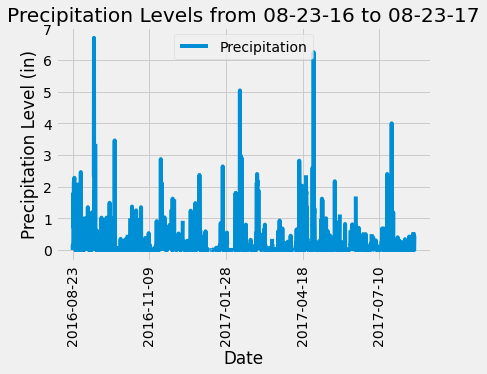

In [52]:
prec_plot = q_r_df.plot(rot = 90)
prec_plot.set_title("Precipitation Levels from 08-23-16 to 08-23-17")
prec_plot.set_ylabel("Precipitation Level (in)")

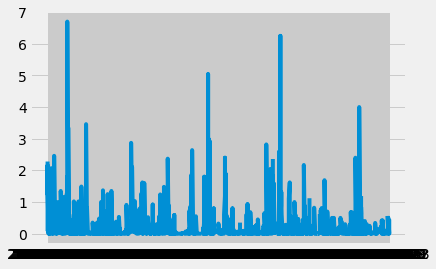

In [29]:
plt.plot(dates,prcp)
plt.show()

In [53]:
# Use Pandas to calcualte the summary statistics for the precipitation data
q_r_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [56]:
# Design a query to show how many stations are available in this dataset?
stats = session.query(func.count(h_station.station)).first()
stats

(9)

In [21]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
act = session.query(h_measure.station,func.count(h_measure.station)).group_by(h_measure.station).order_by(func.count(h_measure.station).desc()).all()
for i in act:
    print(i)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [62]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
#func.min, func.max
l_h_a_t = session.query(func.min(h_measure.tobs),func.max(h_measure.tobs),func.avg(h_measure.tobs)).filter(h_measure.station == 'USC00519281').all()
l_h_a_t

[(54.0, 85.0, 71.66378066378067)]

In [63]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hnto_s = session.query(h_measure.tobs).filter(h_measure.station=="USC00519281")

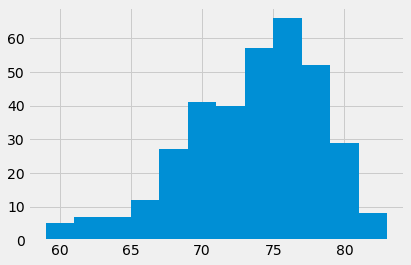

In [65]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
hnto_s = session.query(h_measure.tobs).filter(h_measure.station=="USC00519281").filter(h_measure.date>"2016-08-23").all()
hnto_s
tobs = [row[0] for row in busiest]
plt.hist(tobs, bins = 12)
plt.show()

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
